In [1]:
import mplhep as hep
from egamma_tnp import TagNProbe
from egamma_tnp.plot import plot_efficiency
from matplotlib import pyplot as plt

hep.style.use("CMS")
hep.style.use({"font.size": 16})
hep.style.use({"figure.figsize": (6.4, 4.8)})

/srv/.env/lib/python3.8/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (5.1.0)/charset_normalizer (2.0.9) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [2]:
from distributed import Client
from lpcjobqueue import LPCCondorCluster

cluster = LPCCondorCluster(ship_env=True)
cluster.adapt(minimum=1, maximum=100)
client = Client(cluster)

In [3]:
%%time

tag_n_probe = TagNProbe(
    [
        "/EGamma0/Run2023C-PromptNanoAODv12_v4-v1/NANOAOD",
        "/EGamma1/Run2023C-PromptNanoAODv12_v4-v1/NANOAOD",
    ],
    32,
    goldenjson="json/Cert_Collisions2023_366442_368823_Golden.json",
    toquery=True,
    redirect=False,
)

# tag_n_probe = TagNProbe(
#     ["root_files/Egamma0.root", "root_files/Egamma1.root"],
#     32,
#     goldenjson="json/Cert_Collisions2023_366442_368823_Golden.json",
#     toquery=False,
#     redirect=False,
# )


tag_n_probe.remove_bad_xrootd_files(
    [
        "root://cmsdcadisk.fnal.gov//dcache/uscmsdisk/store/data/Run2023C/EGamma0/NANOAOD/PromptNanoAODv12_v4-v1/70000/a1e1c26c-4328-4147-a247-cb8fa85c0d04.root",
        "root://cmsdcadisk.fnal.gov//dcache/uscmsdisk/store/data/Run2023C/EGamma1/NANOAOD/PromptNanoAODv12_v4-v1/2810000/c0e3ecf9-d65e-440b-acb9-af89a073a217.root",
    ]
)
tag_n_probe.load_events()
tag_n_probe

Dataset /EGamma0/Run2023C-PromptNanoAODv12_v4-v1/NANOAOD has 181 files

First file of dataset /EGamma0/Run2023C-PromptNanoAODv12_v4-v1/NANOAOD is root://cmsdcadisk.fnal.gov//dcache/uscmsdisk/store/data/Run2023C/EGamma0/NANOAOD/PromptNanoAODv12_v4-v1/2810000/00bb4f79-642e-43e2-968a-59fd818f4770.root

Last file of dataset /EGamma0/Run2023C-PromptNanoAODv12_v4-v1/NANOAOD is root://cmsdcadisk.fnal.gov//dcache/uscmsdisk/store/data/Run2023C/EGamma0/NANOAOD/PromptNanoAODv12_v4-v1/80000/f69de8e9-9026-4847-a136-9f66e6240449.root

Dataset /EGamma1/Run2023C-PromptNanoAODv12_v4-v1/NANOAOD has 181 files

First file of dataset /EGamma1/Run2023C-PromptNanoAODv12_v4-v1/NANOAOD is root://cmsdcadisk.fnal.gov//dcache/uscmsdisk/store/data/Run2023C/EGamma1/NANOAOD/PromptNanoAODv12_v4-v1/2810000/03bb8256-62d1-40df-bbf7-6865288dd5c2.root

Last file of dataset /EGamma1/Run2023C-PromptNanoAODv12_v4-v1/NANOAOD is root://cmsdcadisk.fnal.gov//dcache/uscmsdisk/store/data/Run2023C/EGamma1/NANOAOD/PromptNanoAODv12_v

TagNProbe(Events: dask.awkward<from-uproot, npartitions=360>, Number of files: 360, Golden JSON: json/Cert_Collisions2023_366442_368823_Golden.json)

In [4]:
%%time

(
    hpt_pass,
    hpt_all,
    heta_pass,
    heta_all,
) = tag_n_probe.get_tnp_histograms(compute=True, scheduler=None, progress=True)

print(f"Passing probes: {hpt_pass.sum(flow=True)}")
print(f"All probes: {hpt_all.sum(flow=True)}")

[########################################] | 100% Completed | 436.44 ms


DCSchedd::spoolJobFiles:7002:File transfer failed for target job 2362034.0: TOOL at 131.225.189.171 failed to send file(s) to <131.225.189.251:9618>; SCHEDD at 131.225.189.251 failed to create directory /storage/local/data1/condor/spool/2034/0/cluster2362034.proc0.subproc0.tmp/.env/share/jupyter/lab/themes/@jupyterlab/theme-light-extension: No such file or directory (errno 2)
DCSchedd::spoolJobFiles:7002:File transfer failed for target job 2362036.0: TOOL at 131.225.189.171 failed to send file(s) to <131.225.189.251:9618>: error sending /uscmst1b_scratch/lpc1/3DayLifetime/ikrommyd/tmpcw0pzl54/.env/lib/python3.8/site-packages/dask/dataframe/tests/test_indexing.py; SCHEDD at 131.225.189.251 - |Error: receiving file /storage/local/data1/condor/spool/2036/0/cluster2362036.proc0.subproc0.tmp/.env/lib/python3.8/site-packages/dask/dataframe/io/parquet/arrow.py
Task exception was never retrieved
future: <Task finished name='Task-10248' coro=<_wrap_awaitable() done, defined at /srv/.env/lib/pyt

Passing probes: 4242730.0
All probes: 5032504.0
CPU times: user 2min 50s, sys: 3min 23s, total: 6min 13s
Wall time: 8min 43s


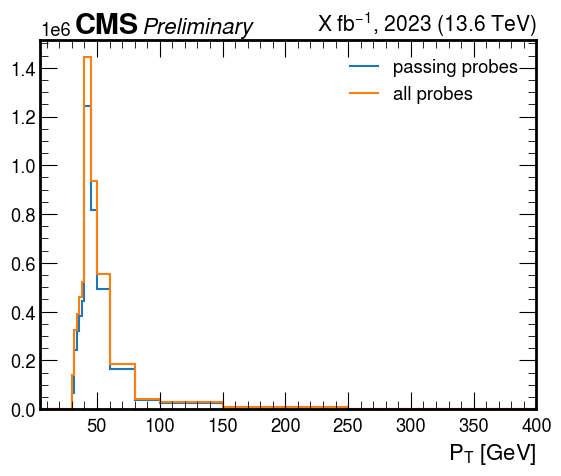

In [5]:
hpt_pass.plot1d(label="passing probes", flow="none")
hpt_all.plot1d(label="all probes", flow="none")
plt.xlim(5, 400)
plt.xlabel(r"$P_T$ [GeV]")
plt.legend()
plt.savefig("plots/pt.pdf", bbox_inches="tight")
hep.cms.label("Preliminary", data=True, lumi="X", year=2023, com=13.6)
plt.show()

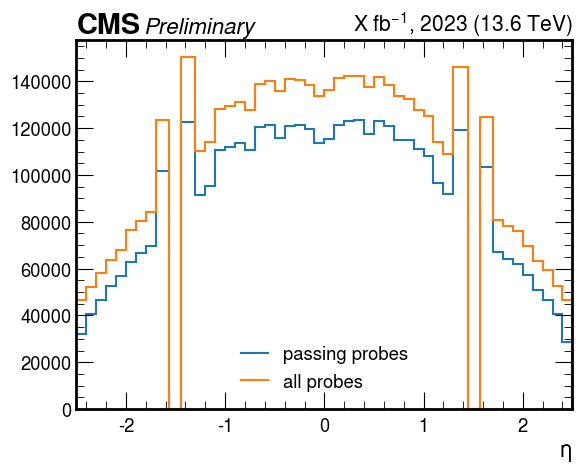

In [6]:
heta_pass.plot1d(label="passing probes", flow="none")
heta_all.plot1d(label="all probes", flow="none")
plt.xlim(-2.5, 2.5)
plt.xlabel(r"$\eta$")
plt.legend()
plt.savefig("plots/eta.pdf", bbox_inches="tight")
hep.cms.label("Preliminary", data=True, lumi="X", year=2023, com=13.6)
plt.show()

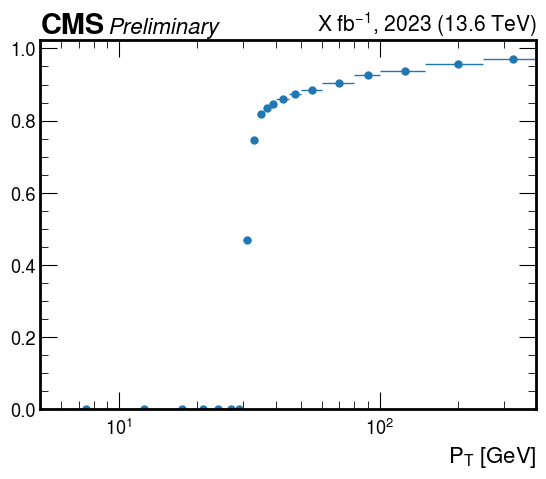

In [7]:
plot_efficiency(hpt_pass, hpt_all)
hep.cms.label("Preliminary", data=True, lumi="X", year=2023, com=13.6)
plt.xlim(5, 400)
plt.xlabel(r"$P_T$ [GeV]")
plt.xscale("log")
plt.savefig("plots/eff_pt.pdf")
plt.show()

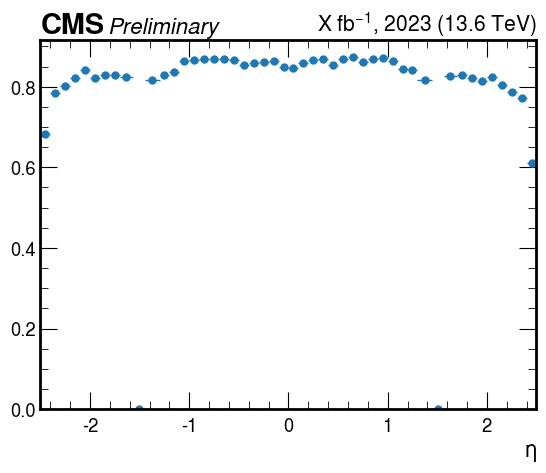

Task exception was never retrieved
future: <Task finished name='Task-164107' coro=<_wrap_awaitable() done, defined at /srv/.env/lib/python3.8/site-packages/distributed/deploy/spec.py:124> exception=AssertionError()>
Traceback (most recent call last):
  File "/srv/.env/lib/python3.8/site-packages/distributed/deploy/spec.py", line 125, in _wrap_awaitable
    return await aw
  File "/srv/.env/lib/python3.8/site-packages/distributed/deploy/spec.py", line 75, in _
    assert self.status == Status.running
AssertionError
Task exception was never retrieved
future: <Task finished name='Task-164106' coro=<_wrap_awaitable() done, defined at /srv/.env/lib/python3.8/site-packages/distributed/deploy/spec.py:124> exception=AssertionError()>
Traceback (most recent call last):
  File "/srv/.env/lib/python3.8/site-packages/distributed/deploy/spec.py", line 125, in _wrap_awaitable
    return await aw
  File "/srv/.env/lib/python3.8/site-packages/distributed/deploy/spec.py", line 75, in _
    assert self.

In [8]:
plot_efficiency(heta_pass, heta_all)
hep.cms.label("Preliminary", data=True, lumi="X", year=2023, com=13.6)
plt.xlim(-2.5, 2.5)
plt.xlabel(r"$\eta$")
plt.savefig("plots/eff_eta.pdf")
plt.show()